In [24]:

import sys
import torch
import os
import numpy as np

from torch.distributions.uniform import Uniform


In [25]:
lunarc = 0

In [26]:

# Set wd
print(os.getcwd())

# set the wd to the base folder for the project
if lunarc == 1:
    os.chdir('/home/samwiq/snpla/seq-posterior-approx-w-nf-dev/two_moons')
else:
    os.chdir('/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev/two_moons')

sys.path.append('./')

print(os.getcwd())

/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev/two_moons
/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev/two_moons


In [27]:
import functions as func
from sbi.utils import BoxUniform

In [47]:
prior = BoxUniform(low=-1*torch.ones(2), high=1*torch.ones(2))

x_o, model = func.set_up_model(prior,
                              mean_radius=0.1,
                              sd_radius=0.01,
                              baseoffset=0.25)

#mean_radius=0.1,
#sd_radius=0.01,
#baseoffset=0.25



In [48]:
post_samples = model.gen_posterior_samples(x_o,10000)


In [49]:
post_samples

tensor([[ 0.2524,  0.2226],
        [ 0.2869,  0.1780],
        [-0.2359, -0.2543],
        ...,
        [-0.2444, -0.1321],
        [ 0.2790,  0.1423],
        [-0.1257, -0.2637]])

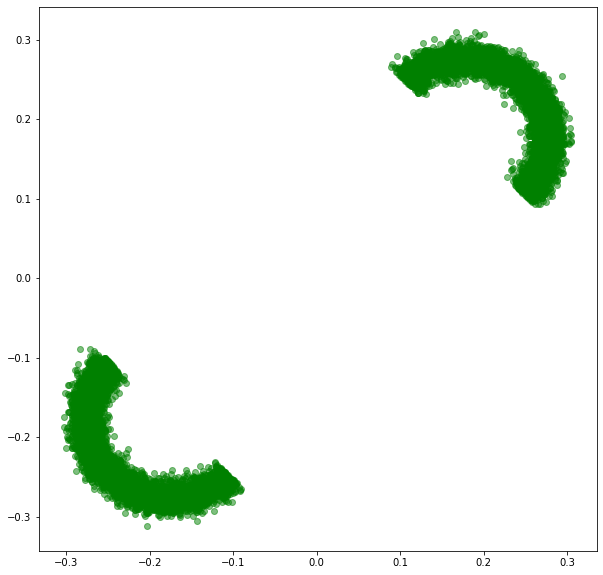

In [50]:
# Plot post samples

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))

plt.scatter(post_samples.numpy()[:,0],post_samples.numpy()[:,1],alpha = 0.5,color = "g")
#plt.ylim((-2, 2))
#plt.xlim((-2, 2))

In [51]:
np.savetxt('data/post_greenberg19_10k.csv', post_samples.numpy(), delimiter=",")


In [33]:
import TwoMoons

In [34]:
x_model = model.model_sim(post_samples)

# but wait this is the posterior pred!

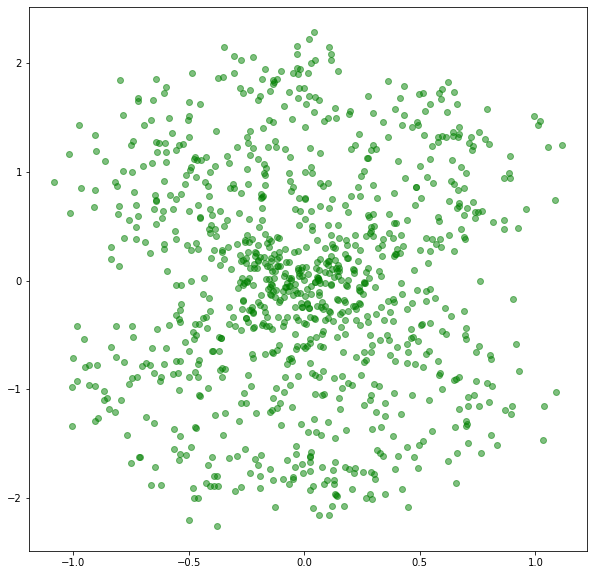

In [35]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))

plt.scatter(x_model.detach().numpy()[:,0],x_model.detach().numpy()[:,1],alpha = 0.5,color = "g")
#plt.ylim((-2, 3))
#plt.xlim((-2, 2))


In [36]:
dim = 2
seed = 1

import numpy as np

torch.manual_seed(seed)

post_samples = model.gen_posterior_samples(x_o,1000)

np.savetxt('data/true_posterior.csv', post_samples.numpy(), delimiter=",")


In [37]:
post_pred = model.model_sim(post_samples)

np.savetxt('data/true_post_pred.csv', post_pred.numpy(), delimiter=",")